# Importing Libraries

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from functools import partial

____

# General annealing function

The below function is a general annealing function.

In [2]:
def optimize(cost, random_jump, init_guess, T, decay,
             k, iterations, save_list=False):
    """
    Optimize a function through annealing, and return
    a list of intermediate guesses.

    -----

    `cost` - calculate cost of guess
    `random_jump` - take a guess and a distance, and move
    randomly
    `init_guess` - initial (random) guess
    `T` - starting temperature
    `decay` - decay rate for temperature
    `k` - boltzmann constant
    `iterations` - number of iterations to make
    `save_list` - if `True`, this returns the of intermediate
    guesses made -- otherwise, returns just the final guess
    """

    p_arr = None

    if save_list:
        p_arr = [init_guess]

    x = init_guess
    c = cost(x)

    for i in range(iterations):
        print(f"Progress: {100 * i / iterations:<8.4}%", end="\r")
        # create a new guess
        new_x = random_jump(
            x,
            (np.random.random_sample() - 0.5) * T
        )

        new_c = cost(new_x)

        if new_c < c: # if it's better, jump
            x = new_x
            c = new_c
            if save_list:
                p_arr.append(x)
        else:
            # otherwise, jump with some probability
            toss = np.random.random_sample()
            if toss < np.exp(-(new_c - c) / (k * T)):
                x = new_x
                c = new_c
                if save_list:
                    p_arr.append(x)

        T *= decay

    if save_list:
        return p_arr
    else:
        return x

____

# Travelling Salesman

## Useful functions

These functions are used in optmizing the travelling salesman problem using the general optimizer algorithm.

In [3]:
def tsp_cost(cities, guess):
    """
    Gives the cost of travelling between cities.

    -----

    `cities` is the list of co-ordinates of the cities
    `guess` is the order in which you visit the cities
    """
    sum_dist = 0

    for i in range(-1, len(guess) - 1):
        sum_dist += np.linalg.norm(cities[guess[i]] - cities[guess[i + 1]])

    return sum_dist

def tsp_jump(guess, distance):
    """
    Swap up to `distance` + 1 values in `guess` to make a
    new guess
    """
    swaps = np.random.randint(int(np.abs(distance)) + 1) + 1
    # print(swaps)
    new_guess = guess.copy()

    for _ in range(swaps):
        swap0, swap1 = np.random.randint(len(guess), size=2)
        tmp = new_guess[swap0]
        new_guess[swap0] = new_guess[swap1]
        new_guess[swap1] = tmp

    return new_guess

Run the `run.py` file for animations.

## Choosing input file

### 10 cities, 500 iterations

In [4]:
input_filename = "tsp_10.txt"
start_temp_scale = 1/5
iterations = 500

### 100 cities, 5,000 iterations

In [4]:
input_filename = "tsp_100.txt"
start_temp_scale = 1/10
iterations = 5000

### 100 cities, 30,000 iterations

In [ ]:
input_filename = "tsp_100.txt"
start_temp_scale = 1/5
iterations = 30000

## Read the list of cities

In [5]:
lines = open(input_filename, "r").readlines()

# list of co-ordinates
cities = []

for line in lines[1:]:
    s = line.split()
    cities.append(np.array([float(s[0]), float(s[1])]))

## Prepare the initial guess

We can start with a random guess, or start with a more optimal one based on some heuristic.

One of the 2 cells below should be run.

### Random initial guess

In [7]:
init_guess = list(range(len(cities)))

### Optimized initial guess

We greedily choose the nearest unvisited neighbour to each point to create an initial guess.

In [9]:
def tsp_greedy_solve(cities):
    """
    Get an initial guess for the TSP greedily
    """
    guess = [0]
    unused = list(range(1, len(cities)))
    prev = cities[0]

    for i in range(1, len(cities)):
        min_city = unused[0]
        min_dist = np.linalg.norm(cities[i] - prev)

        for j in range(1, len(unused)):
            dist = np.linalg.norm(cities[unused[j]] -  prev)
            if dist < min_dist:
                min_city = unused[j]
                min_dist = dist

        unused.remove(min_city)
        prev = cities[min_city]
        guess.append(min_city)

    print(guess)
    return guess


init_guess = tsp_greedy_solve(cities)

[0, 34, 95, 63, 38, 57, 12, 72, 92, 87, 45, 47, 68, 51, 49, 48, 75, 58, 46, 82, 98, 62, 33, 32, 79, 70, 81, 44, 37, 11, 9, 66, 20, 83, 91, 28, 64, 96, 73, 90, 71, 59, 29, 53, 97, 31, 55, 3, 54, 21, 22, 36, 80, 18, 99, 7, 27, 14, 93, 65, 52, 39, 15, 50, 42, 84, 25, 86, 30, 19, 6, 76, 16, 88, 17, 41, 4, 89, 2, 5, 26, 8, 23, 13, 85, 1, 43, 69, 35, 77, 67, 78, 94, 24, 10, 74, 60, 61, 40, 56]


## Get result

In [10]:
optimum_path = optimize(
    partial(tsp_cost, cities),
    tsp_jump,
    init_guess,
    len(cities) * start_temp_scale,
    0.99,
    0.1,
    iterations,
    save_list=False
)

print()
print(optimum_path)
print(tsp_cost(cities, optimum_path))

Progress: 99.98   %
[34, 0, 95, 63, 38, 12, 57, 72, 92, 45, 56, 47, 68, 51, 49, 48, 75, 58, 82, 46, 98, 62, 33, 32, 79, 1, 44, 81, 37, 11, 9, 66, 20, 83, 91, 28, 64, 96, 73, 90, 71, 59, 29, 97, 53, 31, 55, 3, 54, 21, 22, 36, 80, 18, 99, 7, 27, 14, 93, 65, 52, 39, 15, 50, 42, 84, 86, 25, 30, 19, 6, 76, 16, 88, 17, 41, 4, 89, 2, 8, 26, 85, 23, 13, 10, 43, 70, 69, 77, 35, 67, 78, 5, 61, 94, 24, 60, 74, 40, 87]
89.48988006724814


## Plot result

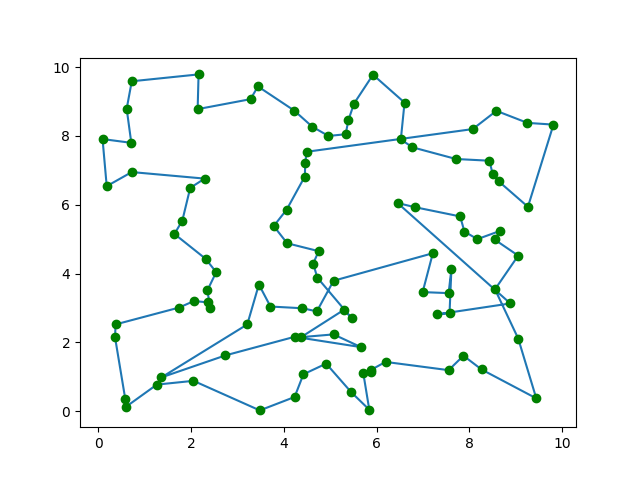

In [12]:
fig, ax = plt.subplots()

ln, = ax.plot([], [])
lnpoints, = ax.plot(
    [cities[i][0] for i in range(len(cities))],
    [cities[i][1] for i in range(len(cities))],
    'go'
)

coords = []
for c in optimum_path:
    coords.append(cities[c])
coords.append(cities[optimum_path[0]])
coords = np.array(coords)
ln.set_data(coords[:, 0], coords[:, 1])

plt.show()

## Animation

Please run `run.py` for animations.

# Conclusions

If we ran the annealing function for 100 cities with a random initial guess, we get a cost of around 120, while with an optimized initial guess we can lower it to around 80.

Therefore, annealing on its own is not a good enough technique to minimize cost functions, we should also carefully select an initial guess.